Coeficientes de la recta: [ 1.0875256  -2.11287847]
Coeficientes de la parábola: [ 1.00550151 -4.94621361  5.71726948]


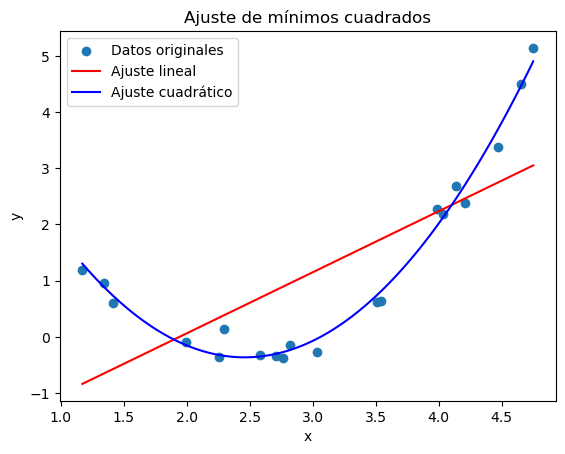

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Derivadas parciales para la recta
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    n = len(xs)
    sum_x = sum(xs)
    sum_x2 = sum(x**2 for x in xs)
    sum_xy = sum(x * y for x, y in zip(xs, ys))
    sum_y = sum(ys)
    
    c1 = sum_x2
    c0 = sum_x
    c_ind = sum_xy
    
    return (c1, c0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    n = len(xs)
    sum_x = sum(xs)
    sum_y = sum(ys)
    
    c1 = sum_x
    c0 = n
    c_ind = sum_y
    
    return (c1, c0, c_ind)

# Derivadas parciales para la parábola
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    n = len(xs)
    sum_x = sum(xs)
    sum_x2 = sum(x**2 for x in xs)
    sum_x3 = sum(x**3 for x in xs)
    sum_x4 = sum(x**4 for x in xs)
    sum_y = sum(ys)
    sum_xy = sum(x * y for x, y in zip(xs, ys))
    sum_x2y = sum((x**2) * y for x, y in zip(xs, ys))
    
    c2 = sum_x4
    c1 = sum_x3
    c0 = sum_x2
    c_ind = sum_x2y
    
    return (c2, c1, c0, c_ind)

def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    n = len(xs)
    sum_x = sum(xs)
    sum_x2 = sum(x**2 for x in xs)
    sum_x3 = sum(x**3 for x in xs)
    sum_xy = sum(x * y for x, y in zip(xs, ys))
    
    c2 = sum_x3
    c1 = sum_x2
    c0 = sum_x
    c_ind = sum_xy
    
    return (c2, c1, c0, c_ind)

def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float, float]:
    n = len(xs)
    sum_x2 = sum(x**2 for x in xs)
    sum_x = sum(xs)
    sum_y = sum(ys)
    
    c2 = sum_x2
    c1 = sum_x
    c0 = n
    c_ind = sum_y
    
    return (c2, c1, c0, c_ind)

# Función para ajustar los mínimos cuadrados
def ajustar_min_cuadrados(xs, ys, gradiente):
    A = []
    B = []
    for der_func in gradiente:
        coefs = der_func(xs, ys)
        A.append(coefs[:-1])
        B.append(coefs[-1])
    A = np.array(A)
    B = np.array(B)
    
    # Resolver el sistema de ecuaciones
    params = np.linalg.solve(A, B)
    return params

# Funciones para la recta y la parábola
def linea(x: float, pars: tuple[float]) -> float:
    a1, a0 = pars
    return a1 * x + a0

def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

# Datos proporcionados
xs = [
    1.1715, 1.3396, 1.4163, 1.9962, 2.2523, 2.2947, 2.5793, 2.7054, 2.7635, 2.8200,
    3.0317, 3.5111, 3.5393, 3.9829, 4.0323, 4.1353, 4.2084, 4.4683, 4.6509, 4.7489
]
ys = [
    1.1902, 0.9564, 0.6078, -0.0856, -0.3550, 0.1355, -0.3171, -0.3425, -0.3758, -0.1518,
    -0.2767, 0.6251, 0.6447, 2.2733, 2.1789, 2.6781, 2.3818, 3.3786, 4.4971, 5.1431
]

# Ajuste para la recta
pars_lineal = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_0])

# Ajuste para la parábola
pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_2_parabol, der_parcial_1_parabol, der_parcial_0_parabol],
)

print("Coeficientes de la recta:", pars_lineal)
print("Coeficientes de la parábola:", pars_cuad)

# Graficar los resultados
plt.scatter(xs, ys, label='Datos originales')

# Graficamos la recta ajustada
x_vals = np.linspace(min(xs), max(xs), 100)
y_vals_linea = [linea(x, pars_lineal) for x in x_vals]
plt.plot(x_vals, y_vals_linea, color='red', label='Ajuste lineal')

# Graficamos la parábola ajustada
y_vals_cuadratica = [cuadratica(x, pars_cuad) for x in x_vals]
plt.plot(x_vals, y_vals_cuadratica, color='blue', label='Ajuste cuadrático')

# Detalles del gráfico
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de mínimos cuadrados")
plt.legend()
plt.show()


In [2]:
import numpy as np

# Función para calcular el error relativo
def calcular_error_relativo(xs, ys, func, pars):
    errores_relativos = []
    for x, y in zip(xs, ys):
        f_x = func(x, pars)
        if y != 0:  # Evitar división por cero
            error_relativo = abs((f_x - y) / y)
            errores_relativos.append(error_relativo)
    return np.mean(errores_relativos)

# Promedio de error relativo para la recta
error_relativo_lineal = calcular_error_relativo(xs, ys, linea, pars_lineal)
print(f"Promedio del error relativo para el ajuste lineal: {error_relativo_lineal:.6f}")

# Promedio de error relativo para la parábola
error_relativo_cuadratico = calcular_error_relativo(xs, ys, cuadratica, pars_cuad)
print(f"Promedio del error relativo para el ajuste cuadrático: {error_relativo_cuadratico:.6f}")


Promedio del error relativo para el ajuste lineal: 1.894868
Promedio del error relativo para el ajuste cuadrático: 0.378667
